In [160]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import time as dt

<attribute 'hour' of 'datetime.time' objects>


In [12]:
# Reading one file only
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


##### Task 1 Merge 12 months using multiple files

In [6]:
files=[file for file in os.listdir("./Sales_Data")]
for file in files:
    print(file) # Print the available files in the Sales_Data folder

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [68]:
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file) # read each file using pandas
    all_months_data=pd.concat([all_months_data,df]) # Merge/Concat current data(df) as the monthly sales to the all_months_Data
    

# Clean the data

In [69]:
nan_df=all_months_data[all_months_data.isna().any(axis=1)]


In [70]:
all_months_data=all_months_data.dropna(how='all')

## Removing duplicates those with "Or"

In [74]:
all_months_data=all_months_data[all_months_data['Order Date'].str[0:2]!='Or']

In [ ]:
# Uncomment to save 
#all_months_data.to_csv("All_Months_Data.csv",index=False) # Convert the entire data to a csv file : Index False= Ignore index file

In [90]:
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mon
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9


#### Task 2: Adding the Month Column

In [107]:
all_months_data['MONTH']=all_months_data['Order Date'].str[0:2].astype('int32') 
months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']


#### Task 3:Convert the data into int & Float types

In [100]:
all_months_data['Quantity Ordered']=pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each']=pd.to_numeric(all_months_data['Price Each'])

#### Task 4: Adding a sales column

In [111]:
all_months_data['Sales']=all_months_data['Quantity Ordered']*all_months_data['Price Each'] 

In [97]:
# Display the data 

In [96]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mon,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


<h1> Analysis Questions</h1

#### Question 1: What is the best month for sales and How much was earned in that month

In [ ]:
# files=[file for file in os.listdir("./Sales_Data")]
# months_data=pd.DataFrame()
# for month,file in files:
#     df=pd.read_csv("./Sales_Data/"+file) # read each file using pandas
    

In [120]:
Sales_results=all_months_data.groupby('MONTH').sum()
Sales_results

,Quantity Ordered,Price Each,Mon,Sale,Sales
MONTH,,,,,
1,10903,1811768.38,9709,1822256.73,1822256.73
2,13449,2188884.72,23950,2202022.42,2202022.42
3,17005,2791207.83,45459,2807100.38,2807100.38
4,20558,3367671.02,73116,3390670.24,3390670.24
5,18667,3135125.13,82830,3152606.75,3152606.75
6,15253,2562025.61,81324,2577802.26,2577802.26
7,16072,2632539.56,100051,2647775.76,2647775.76
8,13448,2230345.42,95688,2244467.88,2244467.88
9,13109,2084992.09,104589,2097560.13,2097560.13


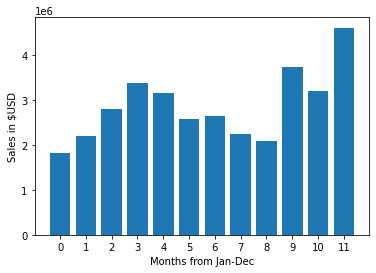

In [121]:
months=range(len(months))
plt.bar(months,Sales_results['Sales'])
plt.xlabel("Months from Jan-Dec")
plt.xticks(months)
plt.ylabel("Sales in $USD" )
plt.show()

#### Question 2: What US. City had the highest number of sales

### Task 4: Adding a city column

In [136]:
# Method 1: Using the lambda .apply() function
'There are three items when we split the string in Purchase Address , the city is the second i.e., index 1'
all_months_data['City']=all_months_data['Purchase Address'].apply(lambda x: x.split(',')[1]) 

# Method 2: Custom function and apply() function
def get_city(address):
    return address.split(',')[1]
all_months_data['City']=all_months_data['Purchase Address'].apply(lambda x: get_city(x))   

all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mon,Sale,MONTH,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,9,379.99,San Francisco


In [144]:
city_results_sum=all_months_data.groupby('City').sum()
city_results=all_months_data.groupby('City')

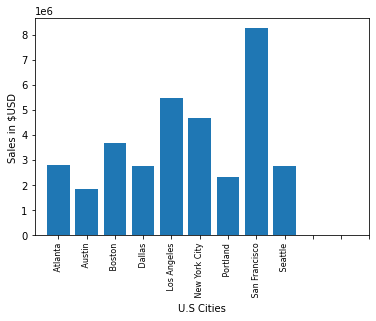

In [147]:
#cities=all_months_data['City'].unique()
cities=[city for city,df in city_results] # 
plt.bar(cities,city_results_sum['Sales'])
plt.xlabel("U.S Cities")
plt.xticks(months,rotation='vertical',size=8)
plt.ylabel("Sales in $USD " )
plt.show()

#### Question 3: What time should be the advertisements to maximize likelihood of customer's buying from store


### Task 5: Adding a Purchase Time column

In [ ]:

all_months_data['Order Time']=pd.to_datetime(all_months_data['Order Date'])
all_months_data['Hour']=all_months_data['Order Time'].dt.hour


In [171]:
purchase_time_results=all_months_data.groupby(all_months_data['Hour']).sum()
purchase_time_results

,Quantity Ordered,Price Each,Mon,Sale,MONTH,Sales
Hour,,,,,,
0,4428,709296.70,27554,713721.27,27554,713721.27
1,2619,458490.00,16657,460866.88,16657,460866.88
2,1398,233833.64,8507,234851.44,8507,234851.44
3,928,144726.42,5904,145757.89,5904,145757.89
4,937,162058.18,6148,162661.01,6148,162661.01
5,1493,229621.21,9301,230679.82,9301,230679.82
6,2810,445000.11,17539,448113.00,17539,448113.00
7,4556,740568.11,28850,744854.12,28850,744854.12
8,7002,1185970.62,43626,1192348.97,43626,1192348.97


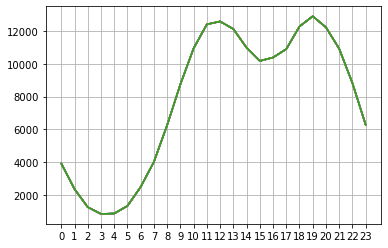

The maximum values are
Order ID            12905
Product             12905
Quantity Ordered    12905
Price Each          12905
Order Date          12905
Purchase Address    12905
Mon                 12905
Sale                12905
MONTH               12905
Sales               12905
City                12905
Purchase Time       12905
Order Time          12905
dtype: int64



The Hourly values 



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mon,Sale,MONTH,Sales,City,Purchase Time,Order Time
Hour,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [187]:
hours=[hour for hour,df in all_months_data.groupby(['Hour'])]
plt.plot(hours,all_months_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()
print("The maximum values are\n{}".format(all_months_data.groupby(['Hour']).count().max()))
print("\n"*2)
print("The Hourly values \n")
all_months_data.groupby(['Hour']).count()
#plt.bar(hours,purchase_time_results['Sales'])

In [ ]:
"""
Best time to advertise 
"""